In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore

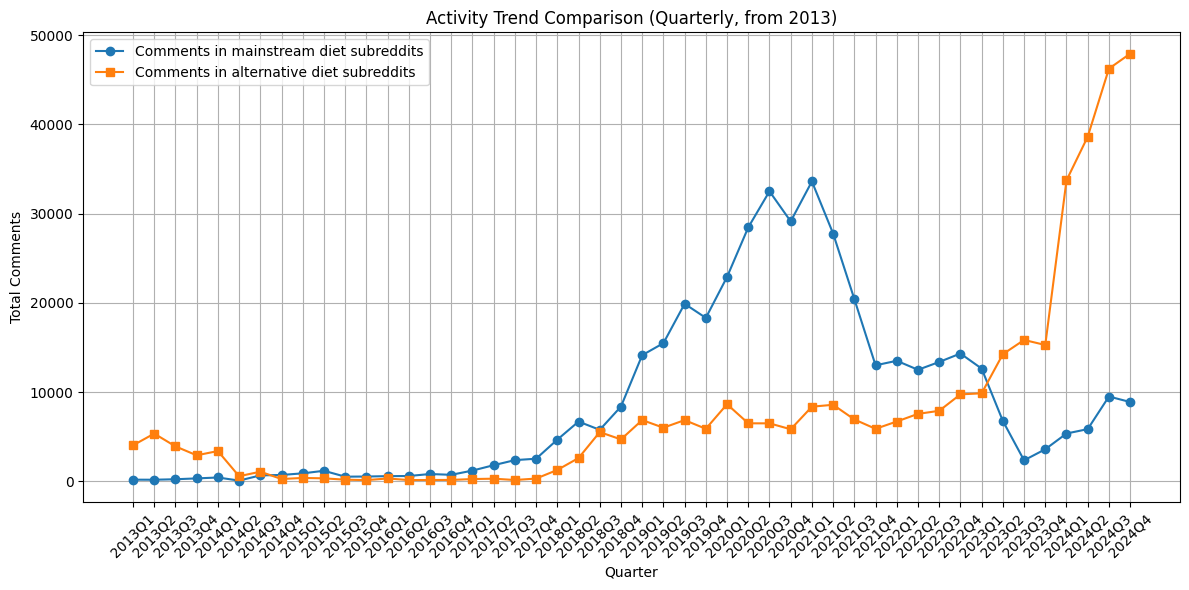

In [15]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")  # Unix timestamp
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")  # Unix timestamp

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter
trend1 = df1.groupby("quarter").size()
trend2 = df2.groupby("quarter").size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trend1.index.astype(str), trend1.values, marker="o", label="Comments in mainstream diet subreddits")
plt.plot(trend2.index.astype(str), trend2.values, marker="s", label="Comments in alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Total Comments")
plt.title("Activity Trend Comparison (Quarterly, from 2013)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Standardized activity

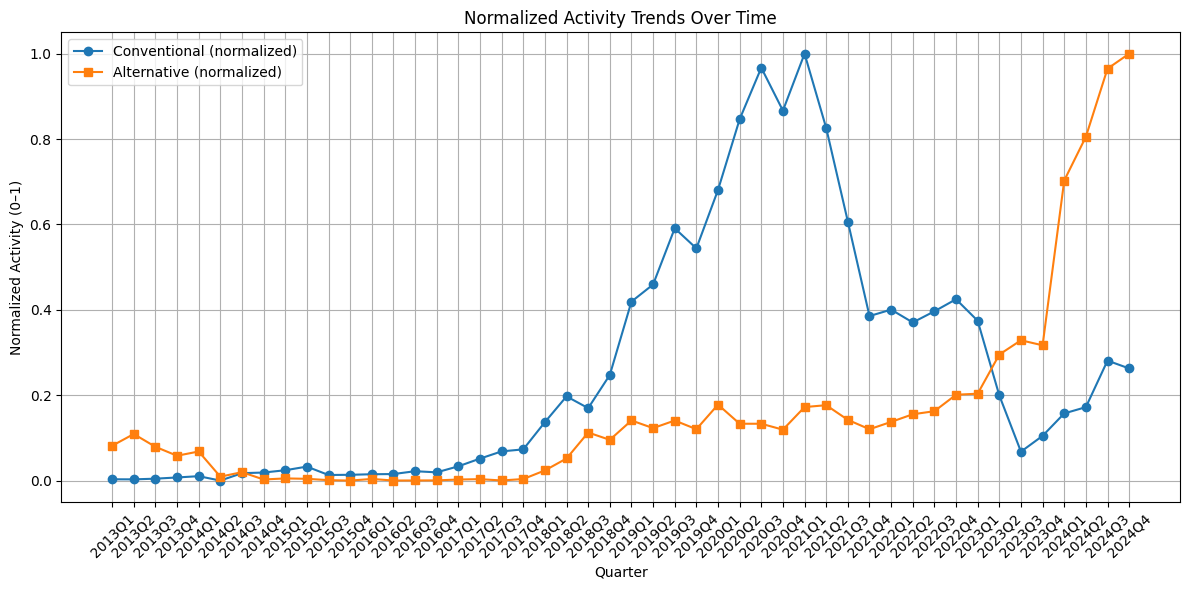

In [12]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")  # Unix timestamp
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")  # Unix timestamp

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter
trend1 = df1.groupby("quarter").size()
trend2 = df2.groupby("quarter").size()

# Normalize to 0–1 scale
trend1_norm = (trend1 - trend1.min()) / (trend1.max() - trend1.min())
trend2_norm = (trend2 - trend2.min()) / (trend2.max() - trend2.min())

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trend1_norm.index.astype(str), trend1_norm.values, marker="o", label="Conventional (normalized)")
plt.plot(trend2_norm.index.astype(str), trend2_norm.values, marker="s", label="Alternative (normalized)")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Normalized Activity (0–1)")
plt.title("Normalized Activity Trends Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


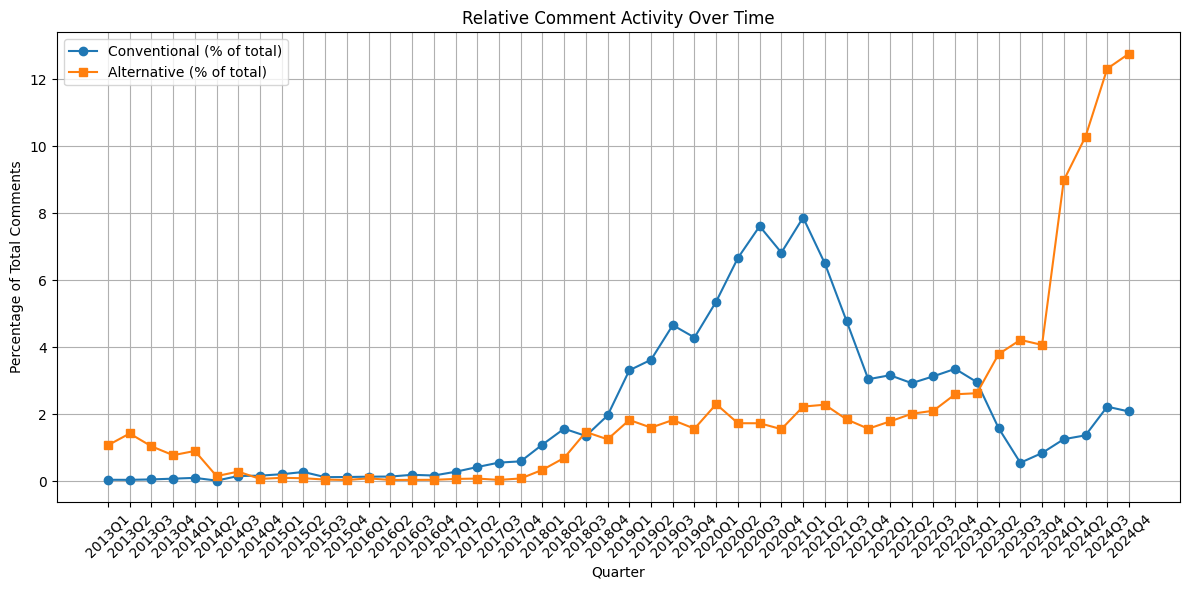

In [13]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")  # Unix timestamp
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")  # Unix timestamp

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter
trend1 = df1.groupby("quarter").size()
trend2 = df2.groupby("quarter").size()

# Convert to percentage of total comments per category
trend1_pct = trend1 / trend1.sum() * 100
trend2_pct = trend2 / trend2.sum() * 100

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trend1_pct.index.astype(str), trend1_pct.values, marker="o", label="Conventional (% of total)")
plt.plot(trend2_pct.index.astype(str), trend2_pct.values, marker="s", label="Alternative (% of total)")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Percentage of Total Comments")
plt.title("Relative Comment Activity Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


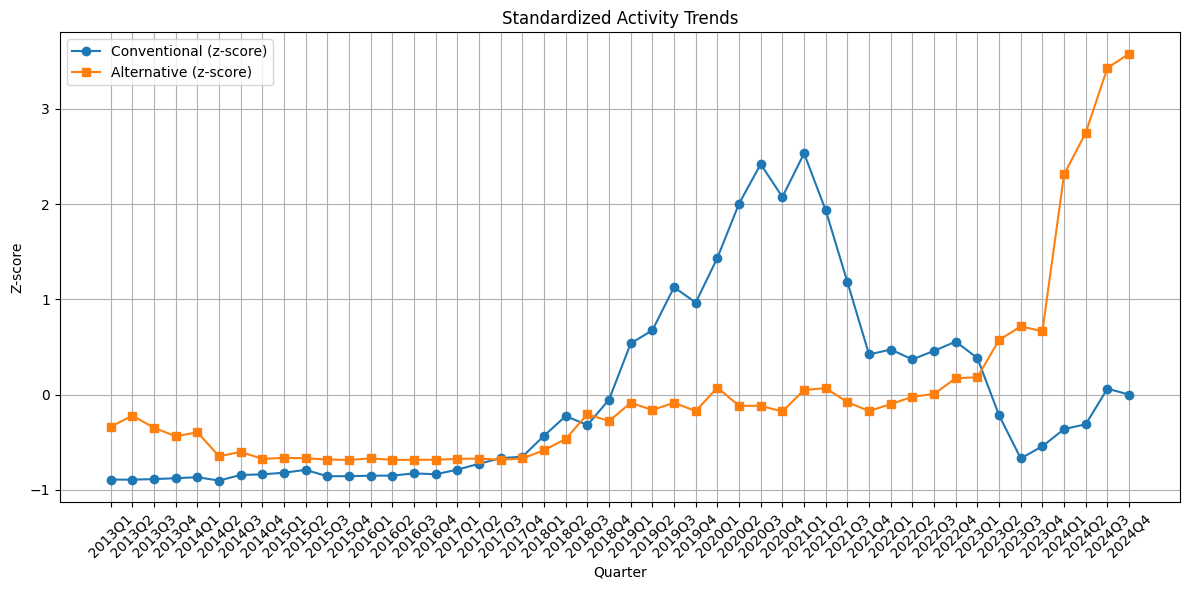

In [14]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")  # Unix timestamp
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")  # Unix timestamp

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter
trend1 = df1.groupby("quarter").size()
trend2 = df2.groupby("quarter").size()

# Compute z-scores
trend1_z = (trend1 - trend1.mean()) / trend1.std()
trend2_z = (trend2 - trend2.mean()) / trend2.std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trend1_z.index.astype(str), trend1_z.values, marker="o", label="Conventional (z-score)")
plt.plot(trend2_z.index.astype(str), trend2_z.values, marker="s", label="Alternative (z-score)")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Z-score")
plt.title("Standardized Activity Trends")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Activity based on unique users

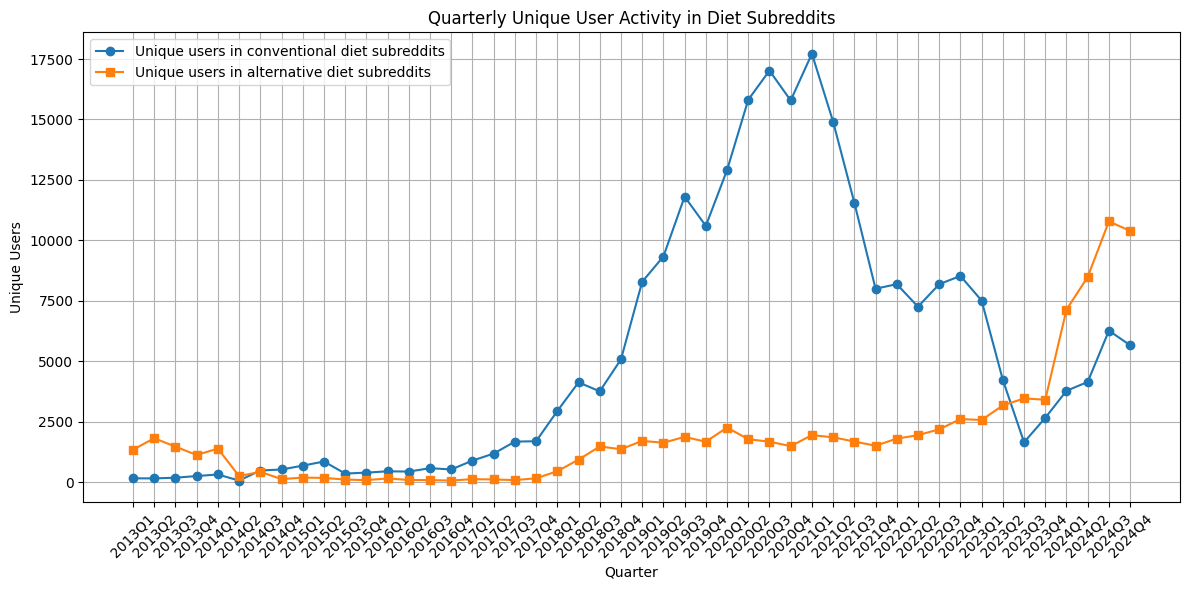

In [ ]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter and count unique users
trend1_users = df1.groupby("quarter")["author"].nunique()
trend2_users = df2.groupby("quarter")["author"].nunique()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trend1_users.index.astype(str), trend1_users.values, marker="o", label="Unique users in mainstream diet subreddits")
plt.plot(trend2_users.index.astype(str), trend2_users.values, marker="s", label="Unique users in alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Unique Users")
plt.title("Quarterly Unique User Activity in Diet Subreddits")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


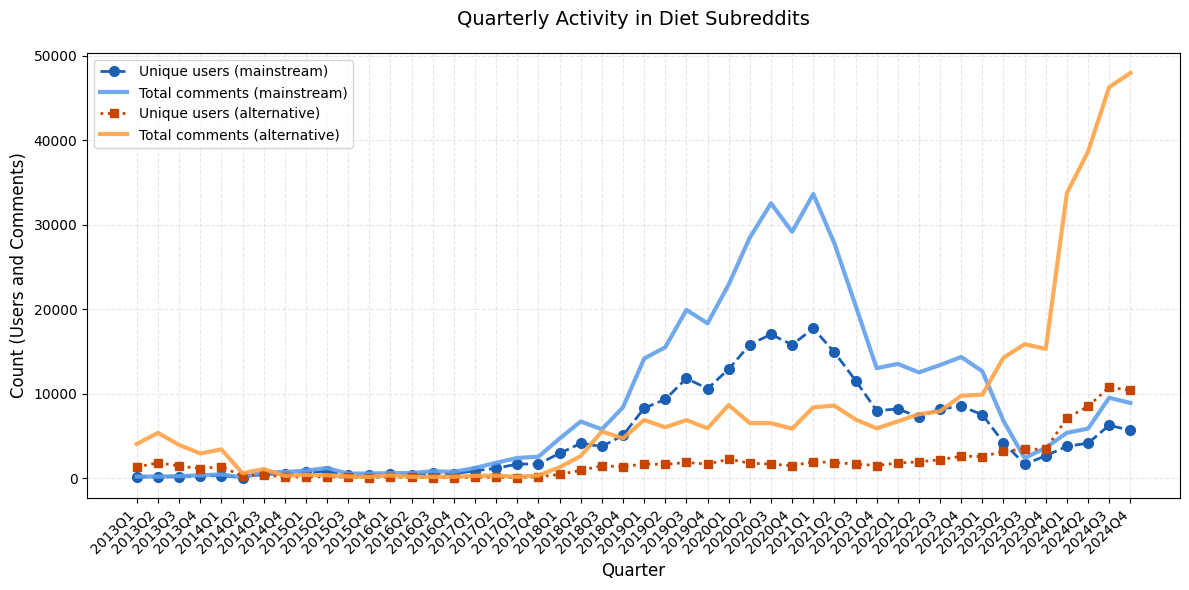

In [48]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter and count unique users
trend1_users = df1.groupby("quarter")["author"].nunique()
trend2_users = df2.groupby("quarter")["author"].nunique()

# Group by quarter and count total comments
trend1_comments = df1.groupby("quarter").size()
trend2_comments = df2.groupby("quarter").size()

# Plot
plt.figure(figsize=(12, 6))

# --- Mainstream Diet Subreddits ---
# Unique Users (dashed line, filled circles, darker blue)
plt.plot(trend1_users.index.astype(str), trend1_users.values, 
         linestyle="--", linewidth=2, marker="o", markersize=7, 
         label="Unique users (mainstream)", 
         color="#1a5fb4")  # Slightly darker blue

# Total Comments (solid line, no marker, lighter blue)
plt.plot(trend1_comments.index.astype(str), trend1_comments.values, 
         linestyle="-", linewidth=3, 
         label="Total comments (mainstream)", 
         color="#62a0ea", alpha=0.9)  # Lighter blue

# --- Alternative Diet Subreddits ---
# Unique Users (dotted line, filled squares, darker orange)
plt.plot(trend2_users.index.astype(str), trend2_users.values, 
         linestyle=":", linewidth=2, marker="s", markersize=6, 
         label="Unique users (alternative)", 
         color="#c64600")  # Darker orange

# Total Comments (solid line, no marker, lighter orange)
plt.plot(trend2_comments.index.astype(str), trend2_comments.values, 
         linestyle="-", linewidth=3, 
         label="Total comments (alternative)", 
         color="#ffa348", alpha=0.9)  # Lighter orange

# --- Styling ---
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Count (Users and Comments)", fontsize=12)
plt.title("Quarterly Activity in Diet Subreddits", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
len(df1), len(df2)

(427187, 375735)

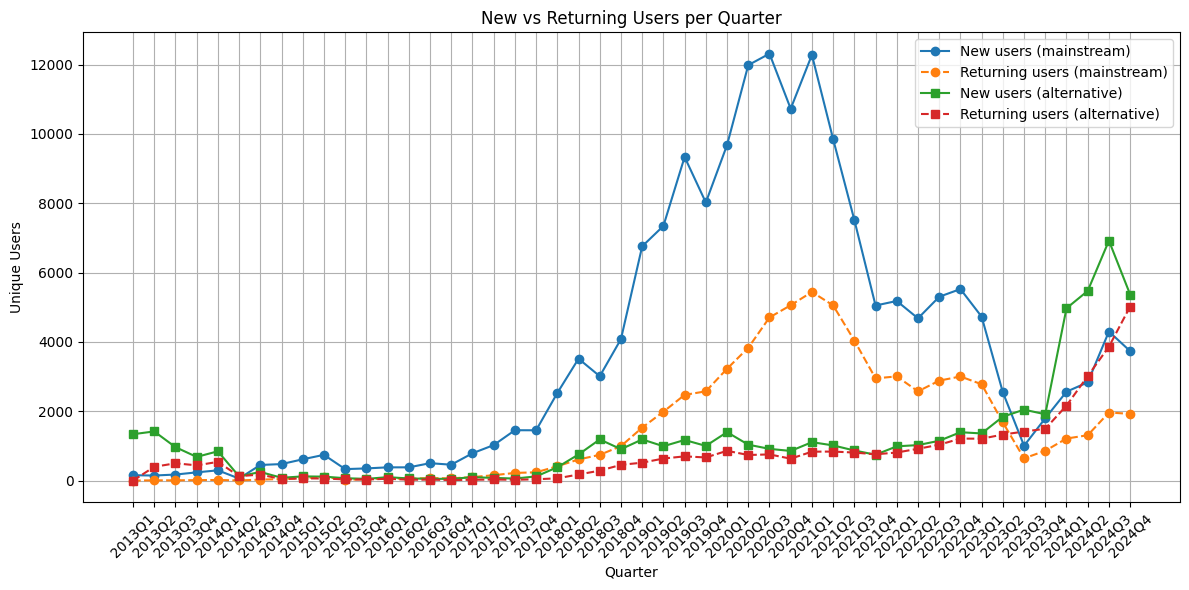

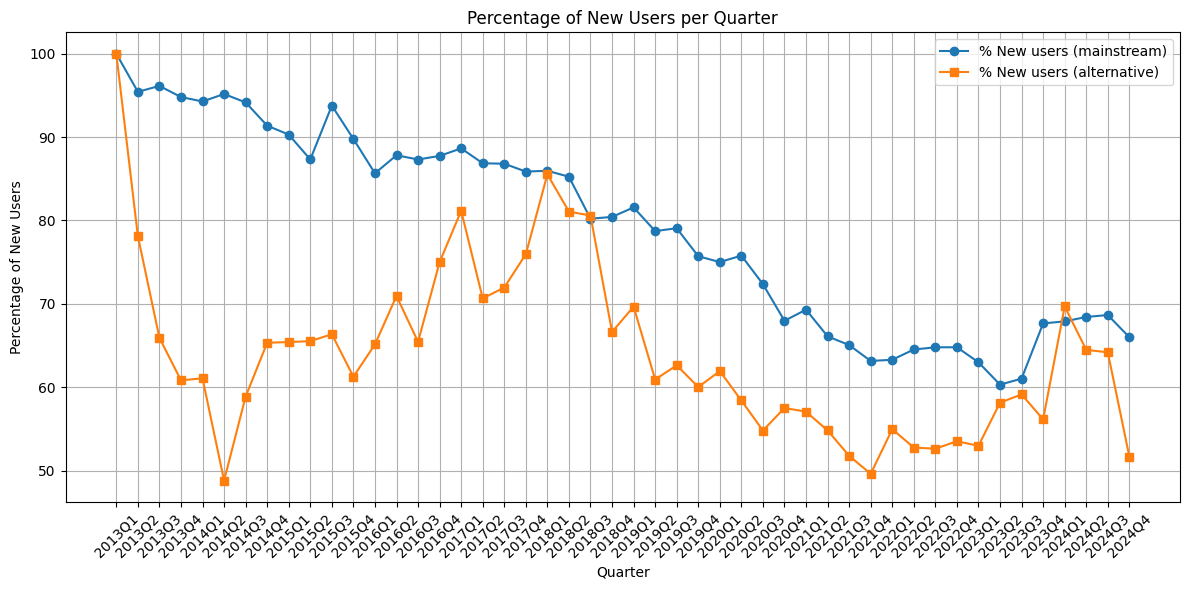

In [18]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc' to datetime
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")

# Filter dates
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Add quarter column
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Sort and find first active quarter per user
df1 = df1.sort_values(by=["author", "created_utc"])
df2 = df2.sort_values(by=["author", "created_utc"])

first_quarter_df1 = df1.drop_duplicates(subset="author")[["author", "quarter"]].rename(columns={"quarter": "first_quarter"})
first_quarter_df2 = df2.drop_duplicates(subset="author")[["author", "quarter"]].rename(columns={"quarter": "first_quarter"})

df1 = df1.merge(first_quarter_df1, on="author", how="left")
df2 = df2.merge(first_quarter_df2, on="author", how="left")

# Count new and total users per quarter
total_users_df1 = df1.groupby("quarter")["author"].nunique()
total_users_df2 = df2.groupby("quarter")["author"].nunique()

new_users_df1 = df1[df1["quarter"] == df1["first_quarter"]].groupby("quarter")["author"].nunique()
new_users_df2 = df2[df2["quarter"] == df2["first_quarter"]].groupby("quarter")["author"].nunique()

# Calculate returning users
returning_users_df1 = total_users_df1 - new_users_df1
returning_users_df2 = total_users_df2 - new_users_df2

# Calculate percentage of new users
pct_new_users_df1 = (new_users_df1 / total_users_df1) * 100
pct_new_users_df2 = (new_users_df2 / total_users_df2) * 100

# Plot new vs. returning users
plt.figure(figsize=(12, 6))
plt.plot(new_users_df1.index.astype(str), new_users_df1.values, marker="o", label="New users (mainstream)")
plt.plot(returning_users_df1.index.astype(str), returning_users_df1.values, marker="o", linestyle="--", label="Returning users (mainstream)")
plt.plot(new_users_df2.index.astype(str), new_users_df2.values, marker="s", label="New users (alternative)")
plt.plot(returning_users_df2.index.astype(str), returning_users_df2.values, marker="s", linestyle="--", label="Returning users (alternative)")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Unique Users")
plt.title("New vs Returning Users per Quarter")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot percentage of new users
plt.figure(figsize=(12, 6))
plt.plot(pct_new_users_df1.index.astype(str), pct_new_users_df1.values, marker="o", label="% New users (mainstream)")
plt.plot(pct_new_users_df2.index.astype(str), pct_new_users_df2.values, marker="s", label="% New users (alternative)")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Percentage of New Users")
plt.title("Percentage of New Users per Quarter")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# Display all unique subreddits
df = pd.read_csv("comments_final.csv")
unique_subreddits = df["subreddit"].unique()
print(unique_subreddits)

['carnivorediet' 'carnivore' 'Ketovore' 'exvegans' 'rawprimal' 'RawMeat'
 'CarnivoreForum' 'SaturatedFat' 'StopEatingSeedOils' 'zerocarb'
 'NutritionalPsychiatry' 'meatogains' 'AnimalBased' 'AntiVegan'
 'StopEatingFiber' 'DietitiansSaidWhatNow' 'raypeat' 'Paleo']


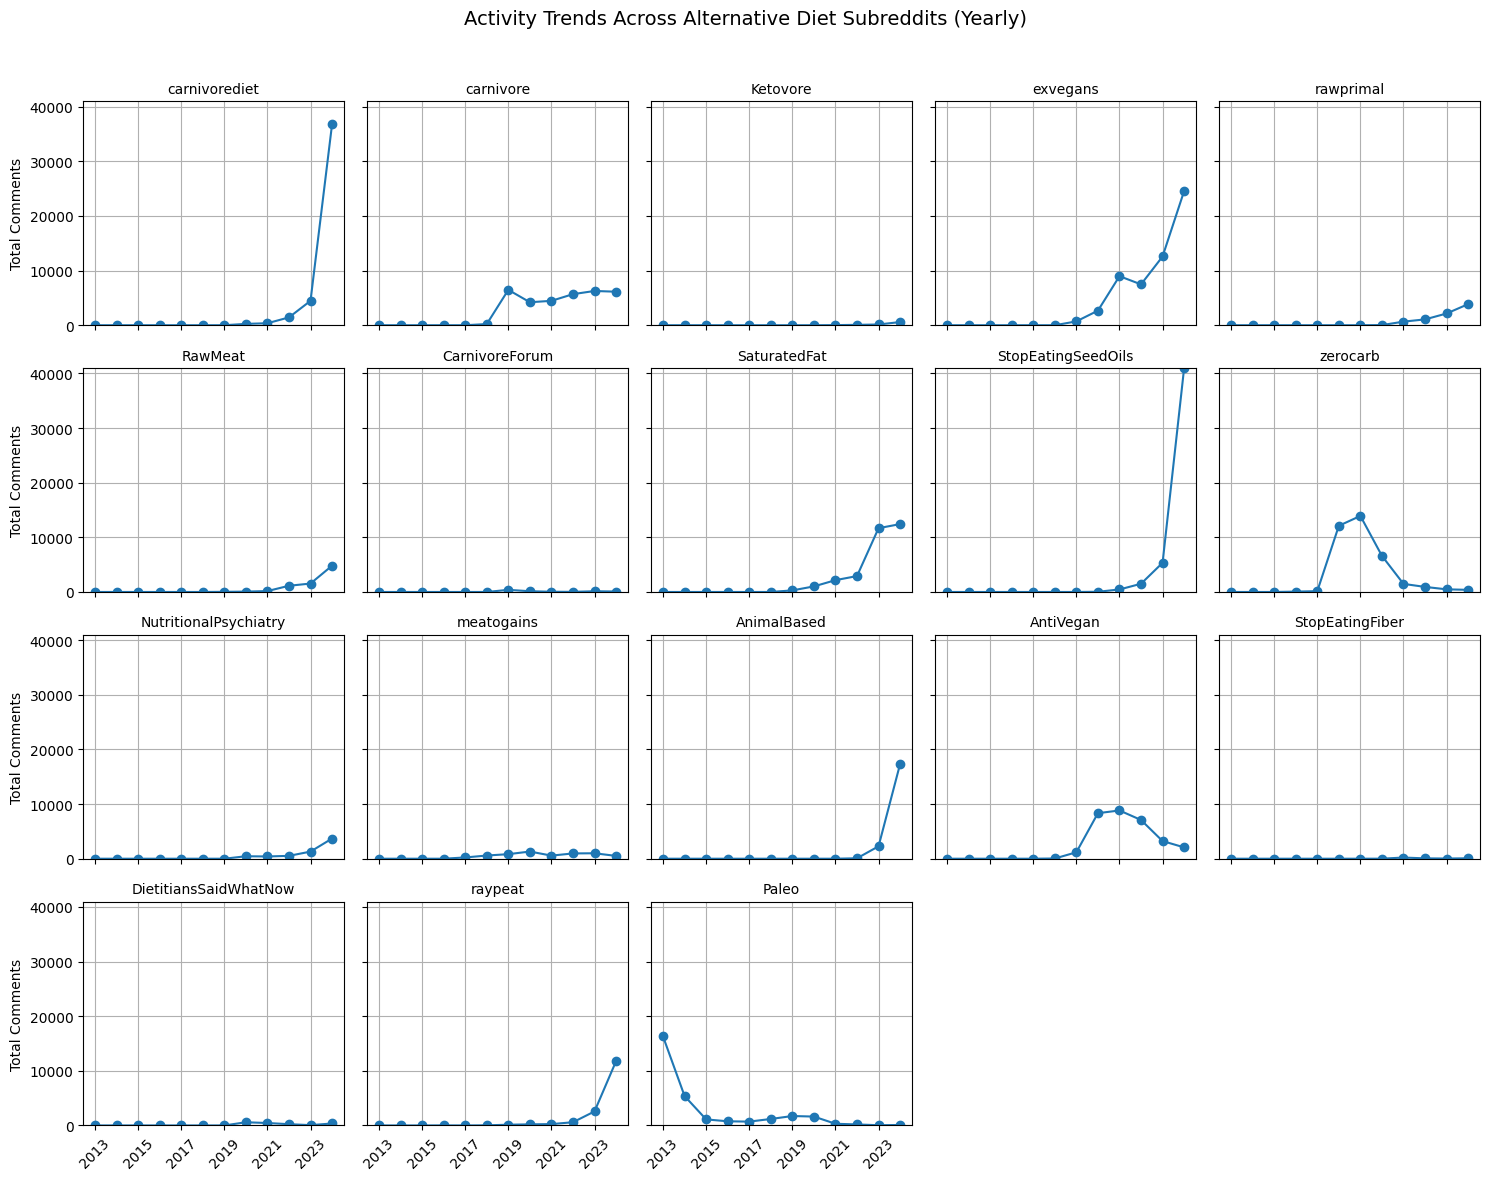

In [5]:
# Load the dataset
df = pd.read_csv("comments_final.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")  # Unix timestamp

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df = df[(df["created_utc"] >= start_date) & (df["created_utc"] < end_date)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")

# Get unique subreddits
subreddits = df["subreddit"].unique()

# Ensure all subreddits have the same date range
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Create subplot grid (adjust rows/columns dynamically)
n_subreddits = len(subreddits)
n_cols = 5  # Number of columns
n_rows = -(-n_subreddits // n_cols)  # Ceiling division for rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3), sharex=True, sharey=True)

# Flatten axes array
axes = axes.flatten()

# Get global y-axis limits
all_counts = df.groupby(["subreddit", "year"]).size()
y_max = all_counts.max()

# Plot each subreddit's activity trend
for i, subreddit in enumerate(subreddits):
    ax = axes[i]
    df_filtered = df[df["subreddit"] == subreddit]
    activity_trend = df_filtered.groupby("year").size().reindex(full_range, fill_value=0)

    ax.plot(activity_trend.index.astype(str), activity_trend, marker="o", linestyle="-")
    ax.set_title(subreddit, fontsize=10)
    
    # Only set y-label for the first column of each row
    if i % n_cols == 0:
        ax.set_ylabel("Total Comments")
        
    ax.set_ylim(0, y_max)
    ax.grid(True)

    # Set x-axis labels
    every_other_year = range(0, len(full_range), 2)
    ax.set_xticks(every_other_year)
    ax.set_xticklabels(full_range[every_other_year].astype(str), rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Activity Trends Across Alternative Diet Subreddits (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

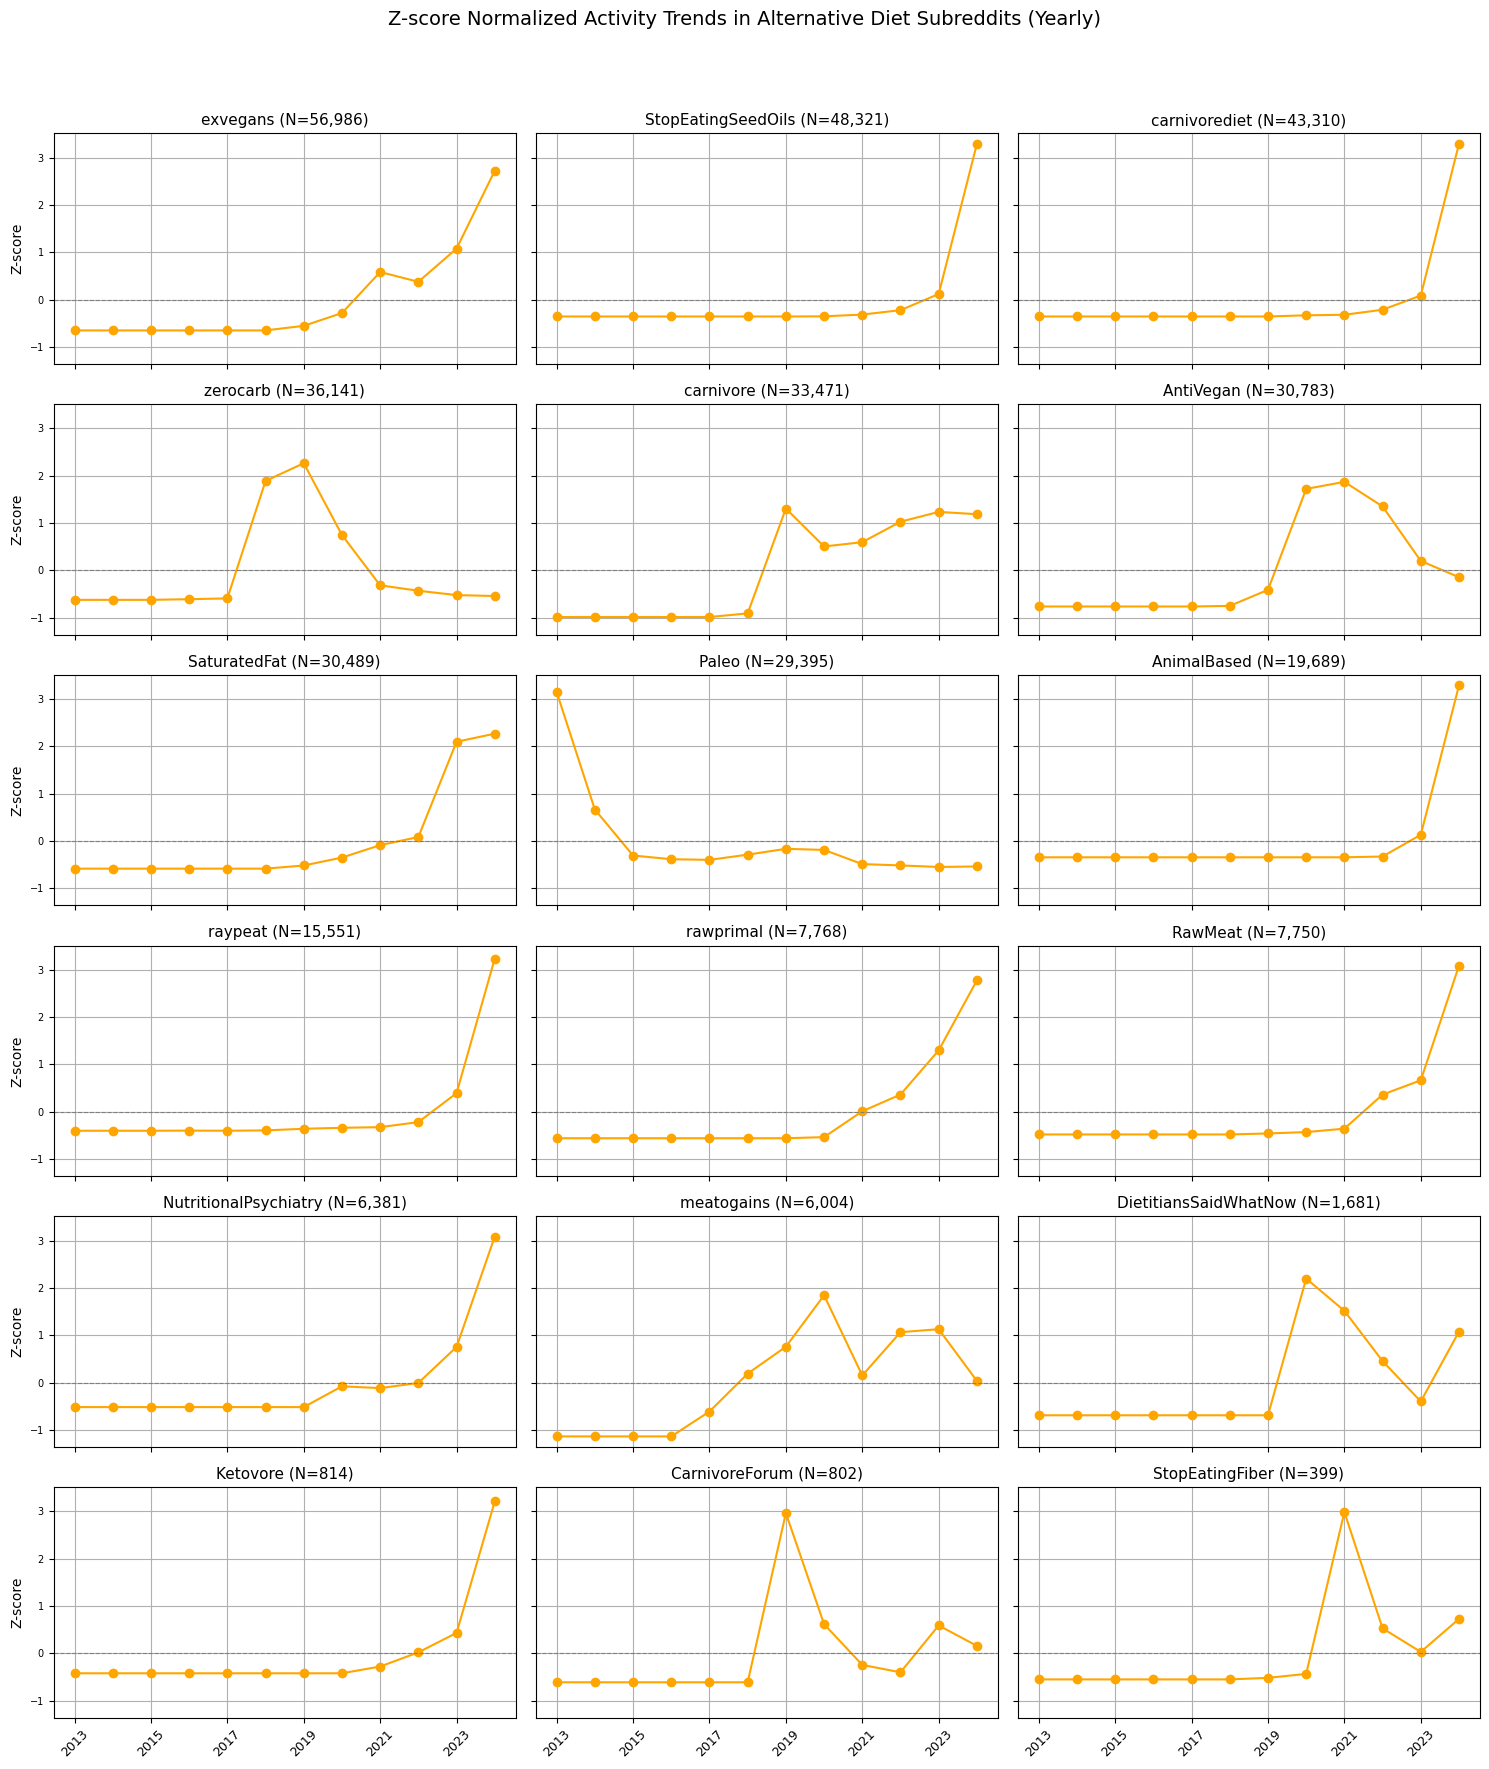

In [29]:
# Load the dataset
df = pd.read_csv("comments_final.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df = df[(df["created_utc"] >= start_date) & (df["created_utc"] < end_date)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")

# Create list of all subreddits, sorted by total activity
subreddits = df["subreddit"].value_counts().index.tolist()

# Ensure all subreddits have the same date range
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Create subplot grid: 6 rows, 3 columns (landscape A4 fit)
n_rows = 6
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

for i, subreddit in enumerate(subreddits):
    if i >= len(axes):
        break

    ax = axes[i]
    df_filtered = df[df["subreddit"] == subreddit]
    yearly_counts = df_filtered.groupby("year").size().reindex(full_range, fill_value=0)
    total_comments = yearly_counts.sum()

    # Compute Z-score (normalize within each subreddit)
    z_scores = zscore(yearly_counts)

    ax.plot(full_range.astype(str), z_scores, color="orange", marker="o", linestyle="-")
    ax.set_title(f"{subreddit} (N={total_comments:,})", fontsize=11)
    ax.axhline(0, color="gray", linewidth=0.8, linestyle="--")

    if i % n_cols == 0:
        ax.set_ylabel("Z-score", fontsize=10)

    every_other = range(0, len(full_range), 2)
    ax.set_xticks([full_range[j].strftime('%Y') for j in every_other])
    ax.set_xticklabels([full_range[j].strftime('%Y') for j in every_other], rotation=45, fontsize=9)

    ax.tick_params(axis='y', labelsize=7)
    ax.grid(True)

# Hide unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Z-score Normalized Activity Trends in Alternative Diet Subreddits (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


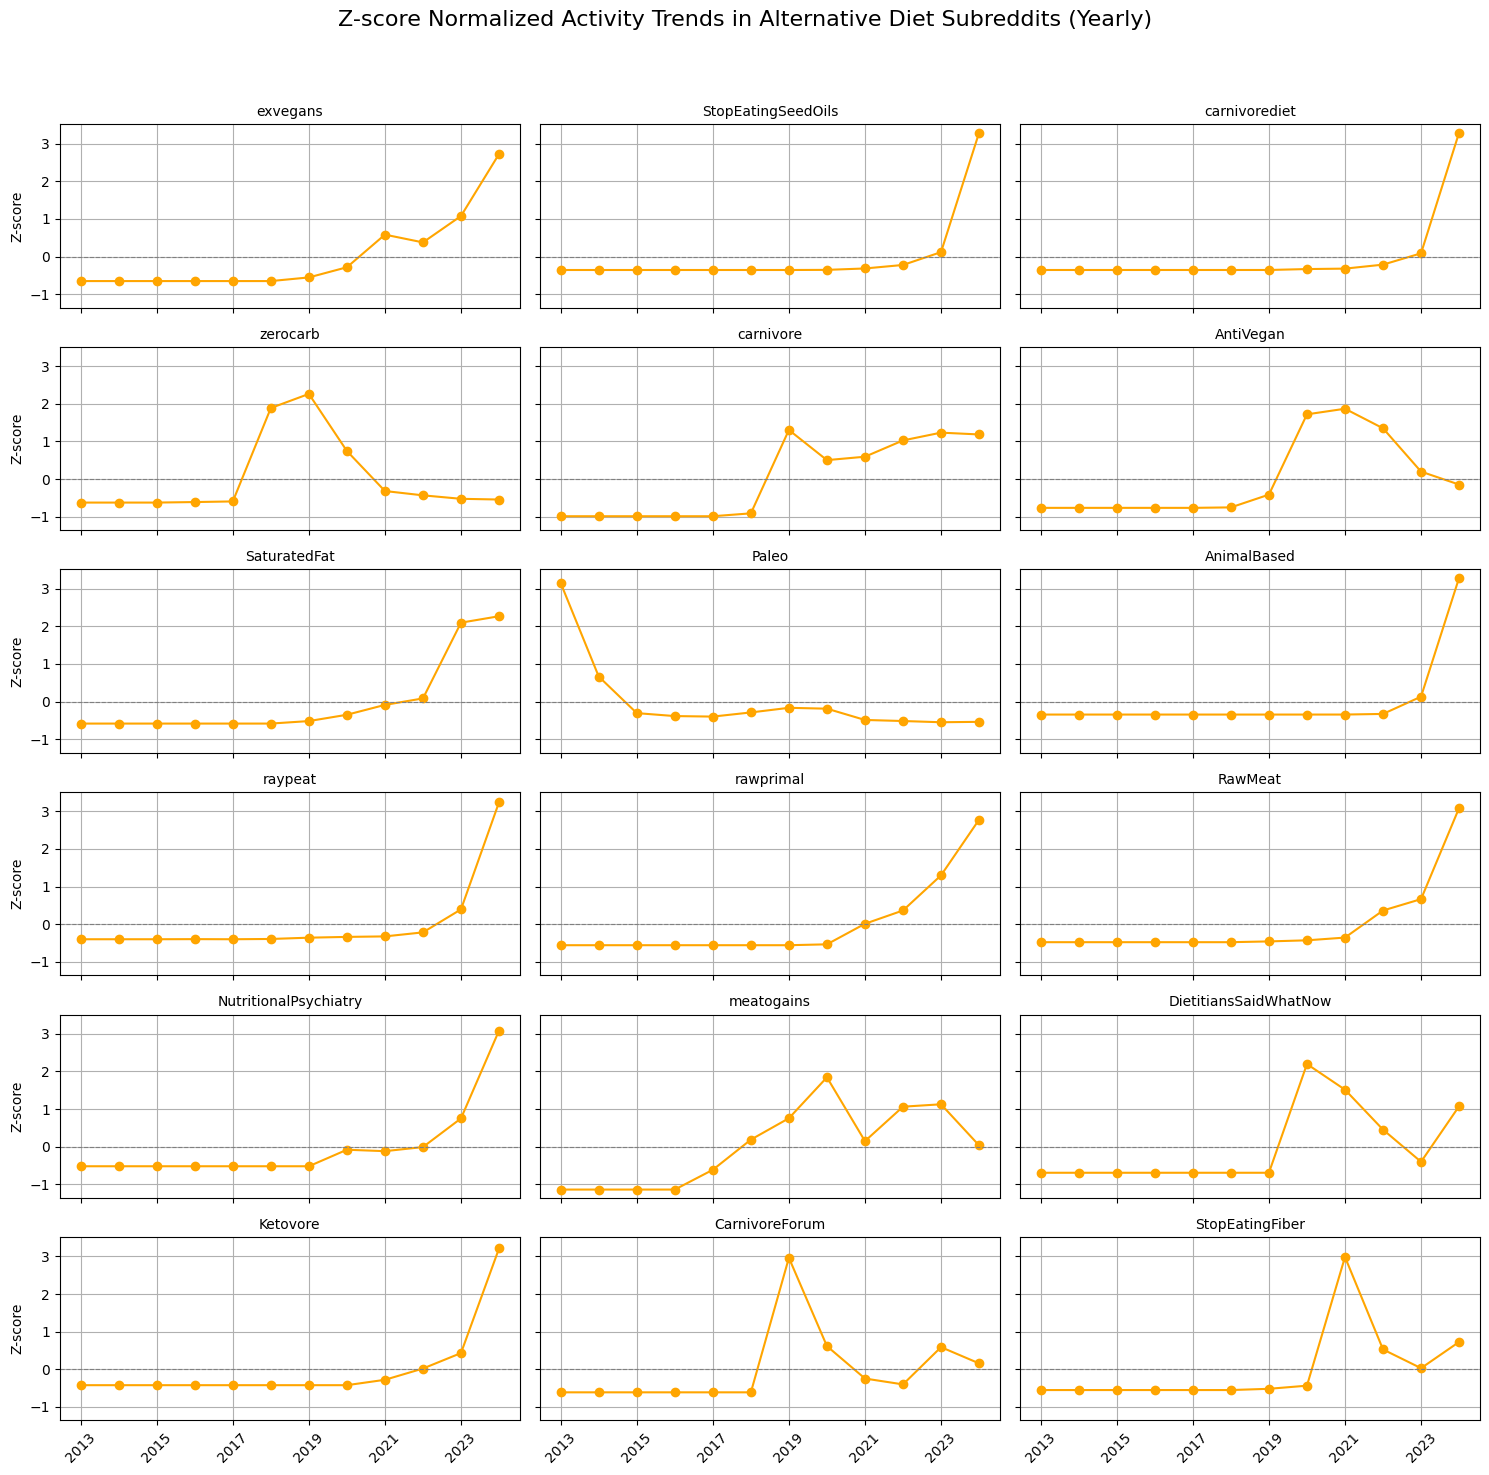

In [24]:
# Load the dataset
df = pd.read_csv("comments_final.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df = df[(df["created_utc"] >= start_date) & (df["created_utc"] < end_date)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")

# Create list of all subreddits, sorted by total activity
subreddits = df["subreddit"].value_counts().index.tolist()

# Ensure all subreddits have the same date range
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Create subplot grid: 6 rows, 3 columns
n_rows = 6
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 2.5), sharex=True, sharey=True)

axes = axes.flatten()

for i, subreddit in enumerate(subreddits):
    if i >= len(axes):
        break

    ax = axes[i]
    df_filtered = df[df["subreddit"] == subreddit]
    yearly_counts = df_filtered.groupby("year").size().reindex(full_range, fill_value=0)

    # Compute Z-score (normalize within each subreddit)
    z_scores = zscore(yearly_counts)

    ax.plot(full_range.astype(str), z_scores, color="orange", marker="o", linestyle="-")
    ax.set_title(subreddit, fontsize=10)
    ax.axhline(0, color="gray", linewidth=0.8, linestyle="--")

    # Only set y-label for leftmost column
    if i % n_cols == 0:
        ax.set_ylabel("Z-score")

    # X-axis ticks every 2 years
    every_other = range(0, len(full_range), 2)
    ax.set_xticks([full_range[j].strftime('%Y') for j in every_other])
    ax.set_xticklabels([full_range[j].strftime('%Y') for j in every_other], rotation=45)

    ax.grid(True)

# Hide unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Z-score Normalized Activity Trends in Alternative Diet Subreddits (Yearly)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Phrases

C:\Users\Arvin\AppData\Local\Temp\ipykernel_284\2855201380.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
C:\Users\Arvin\AppData\Local\Temp\ipykernel_284\2855201380.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")


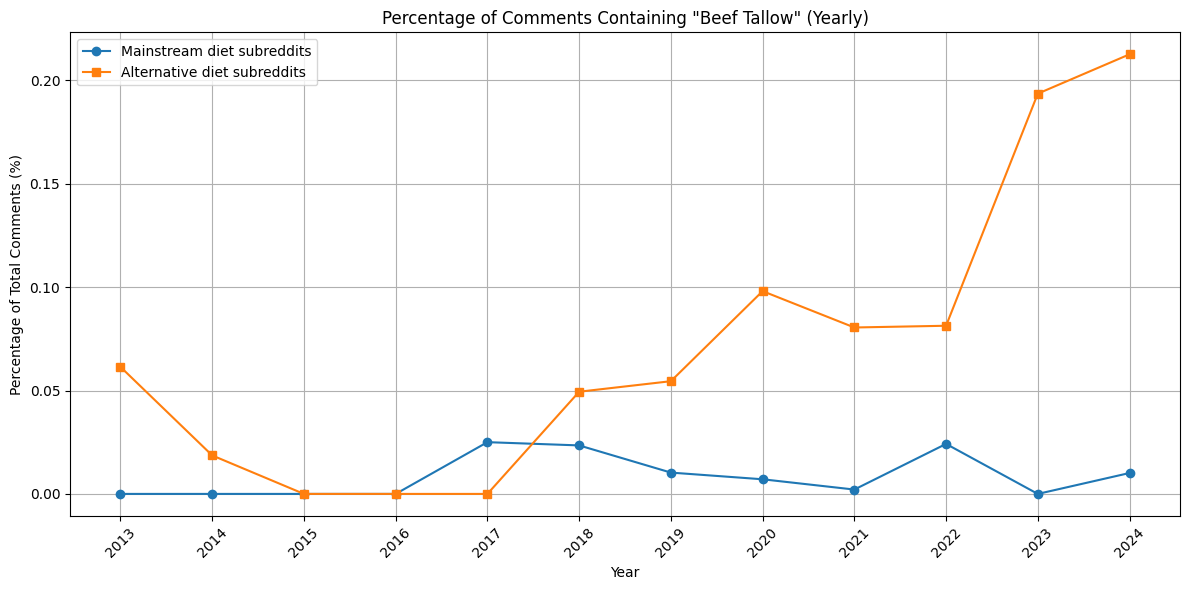

In [7]:
# Load both datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")

# Filter date range: Jan 1, 2013 to before Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Filter for "beef tallow" mentions
df1_beef = df1[df1["body"].str.contains("beef tallow", case=False, na=False)]
df2_beef = df2[df2["body"].str.contains("beef tallow", case=False, na=False)]

# Add 'year' column
df1["year"] = df1["created_utc"].dt.to_period("Y")
df2["year"] = df2["created_utc"].dt.to_period("Y")
df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")

# Define full year range
full_range = pd.period_range("2013", "2024", freq="Y")

# Aggregate total and beef tallow comment counts
total1 = df1.groupby("year").size().reindex(full_range, fill_value=0)
total2 = df2.groupby("year").size().reindex(full_range, fill_value=0)
beef1 = df1_beef.groupby("year").size().reindex(full_range, fill_value=0)
beef2 = df2_beef.groupby("year").size().reindex(full_range, fill_value=0)

# Compute percentages
pct1 = (beef1 / total1) * 100
pct2 = (beef2 / total2) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pct1.index.astype(str), pct1, marker="o", linestyle="-", label="Mainstream diet subreddits")
plt.plot(pct2.index.astype(str), pct2, marker="s", linestyle="-", label="Alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Beef Tallow" (Yearly)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_284\800982090.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
C:\Users\Arvin\AppData\Local\Temp\ipykernel_284\800982090.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")


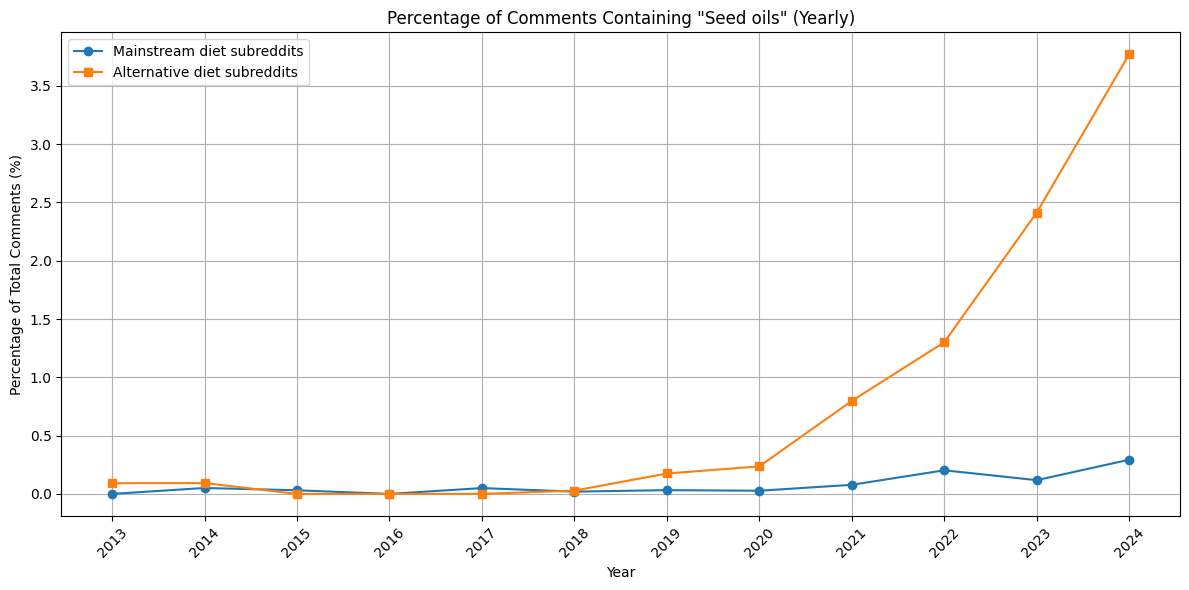

In [10]:
# Load both datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")

# Filter date range: Jan 1, 2013 to before Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Filter for "beef tallow" mentions
df1_beef = df1[df1["body"].str.contains("seed oil", case=False, na=False)]
df2_beef = df2[df2["body"].str.contains("seed oil", case=False, na=False)]

# Add 'year' column
df1["year"] = df1["created_utc"].dt.to_period("Y")
df2["year"] = df2["created_utc"].dt.to_period("Y")
df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")

# Define full year range
full_range = pd.period_range("2013", "2024", freq="Y")

# Aggregate total and beef tallow comment counts
total1 = df1.groupby("year").size().reindex(full_range, fill_value=0)
total2 = df2.groupby("year").size().reindex(full_range, fill_value=0)
beef1 = df1_beef.groupby("year").size().reindex(full_range, fill_value=0)
beef2 = df2_beef.groupby("year").size().reindex(full_range, fill_value=0)

# Compute percentages
pct1 = (beef1 / total1) * 100
pct2 = (beef2 / total2) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pct1.index.astype(str), pct1, marker="o", linestyle="-", label="Mainstream diet subreddits")
plt.plot(pct2.index.astype(str), pct2, marker="s", linestyle="-", label="Alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Seed oils" (Yearly)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_284\529001763.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
C:\Users\Arvin\AppData\Local\Temp\ipykernel_284\529001763.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")


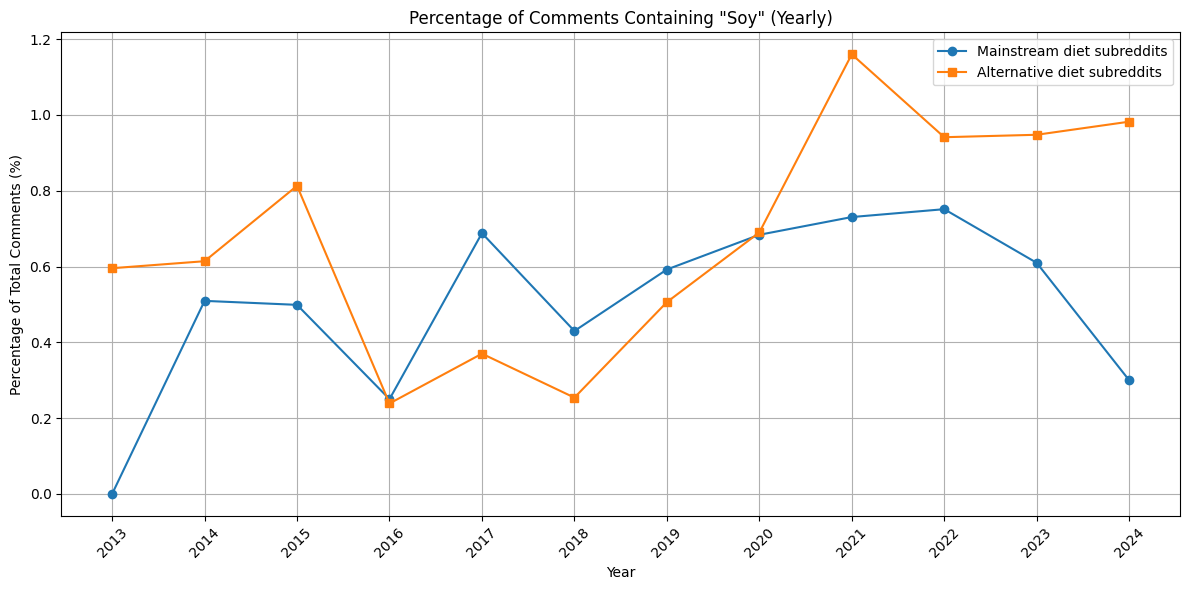

In [11]:
# Load both datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("comments_final.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"], unit="s")

# Filter date range: Jan 1, 2013 to before Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Filter for "beef tallow" mentions
df1_beef = df1[df1["body"].str.contains("soy", case=False, na=False)]
df2_beef = df2[df2["body"].str.contains("soy", case=False, na=False)]

# Add 'year' column
df1["year"] = df1["created_utc"].dt.to_period("Y")
df2["year"] = df2["created_utc"].dt.to_period("Y")
df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")

# Define full year range
full_range = pd.period_range("2013", "2024", freq="Y")

# Aggregate total and beef tallow comment counts
total1 = df1.groupby("year").size().reindex(full_range, fill_value=0)
total2 = df2.groupby("year").size().reindex(full_range, fill_value=0)
beef1 = df1_beef.groupby("year").size().reindex(full_range, fill_value=0)
beef2 = df2_beef.groupby("year").size().reindex(full_range, fill_value=0)

# Compute percentages
pct1 = (beef1 / total1) * 100
pct2 = (beef2 / total2) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pct1.index.astype(str), pct1, marker="o", linestyle="-", label="Mainstream diet subreddits")
plt.plot(pct2.index.astype(str), pct2, marker="s", linestyle="-", label="Alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Soy" (Yearly)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


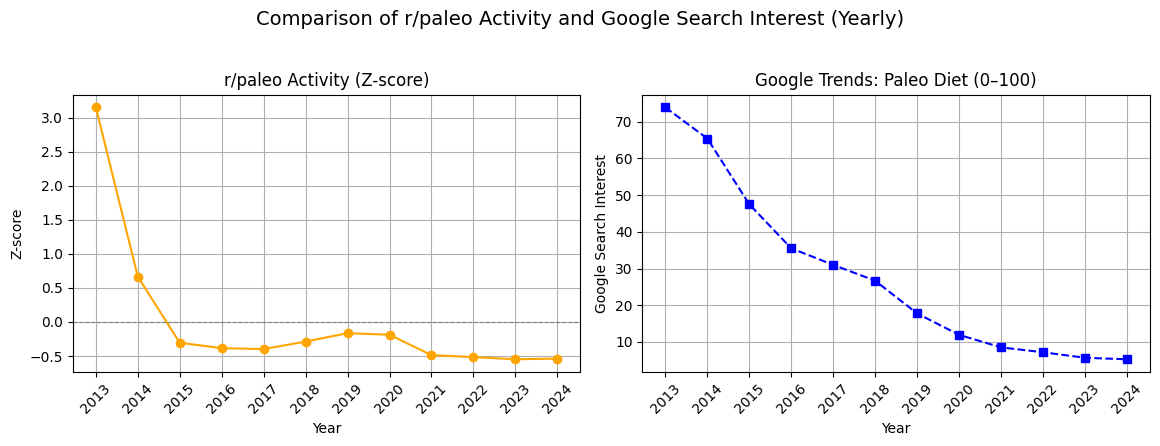

In [40]:
# Load Reddit dataset
df = pd.read_csv("comments_final.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'paleo' subreddit
df_paleo = df[df["subreddit"].str.lower() == "paleo"]

# Group by year
full_range = list(range(df["year"].min(), df["year"].max() + 1))
paleo_yearly_counts = df_paleo.groupby("year").size().reindex(full_range, fill_value=0)

# Compute Z-score for subreddit activity
paleo_z_scores = zscore(paleo_yearly_counts)

# Load Google Trends dataset
google_trends = pd.read_csv("paleo google trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)  # Clean whitespace
google_trends["Month"] = pd.to_datetime(google_trends["Month"])

# Keep correct columns
value_column = google_trends.columns[1]  # Should be 'paleo diet: (Worldwide)'

# Filter date range
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year

# Group by year (average Google interest per year)
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.7, 4.5), sharex=True)

# Reddit activity plot
axes[0].plot(full_range, paleo_z_scores, color="orange", marker="o", linestyle="-")
axes[0].axhline(0, color="gray", linewidth=0.8, linestyle="--")
axes[0].set_title("r/paleo Activity (Z-score)", fontsize=12)
axes[0].set_ylabel("Z-score", fontsize=10)
axes[0].grid(True)

# Google Trends plot
axes[1].plot(full_range, google_yearly.values, color="blue", marker="s", linestyle="--")
axes[1].set_title("Google Trends: Paleo Diet (0–100)", fontsize=12)
axes[1].set_ylabel("Google Search Interest", fontsize=10)
axes[1].grid(True)

# Common X-axis settings
for ax in axes:
    ax.set_xlabel("Year", fontsize=10)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)

plt.suptitle("Comparison of r/paleo Activity and Google Search Interest (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



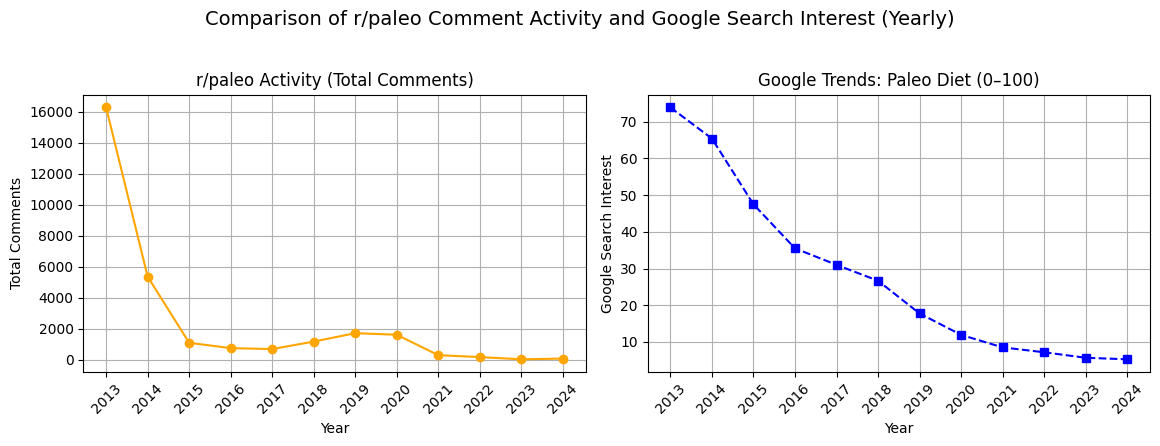

In [52]:
# Load Reddit dataset
df = pd.read_csv("comments_final.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'paleo' subreddit
df_paleo = df[df["subreddit"].str.lower() == "paleo"]

# Group by year
full_range = list(range(df["year"].min(), df["year"].max() + 1))
paleo_yearly_counts = df_paleo.groupby("year").size().reindex(full_range, fill_value=0)

# Load Google Trends dataset
google_trends = pd.read_csv("paleo google trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])

# Identify correct Google Trends value column
value_column = google_trends.columns[1]

# Filter date range
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year

# Group Google Trends by year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.7, 4.5), sharex=True)

# Reddit total comments plot
axes[0].plot(full_range, paleo_yearly_counts.values, color="orange", marker="o", linestyle="-")
axes[0].set_title("r/paleo Activity (Total Comments)", fontsize=12)
axes[0].set_ylabel("Total Comments", fontsize=10)
axes[0].grid(True)

# Google Trends plot
axes[1].plot(full_range, google_yearly.values, color="blue", marker="s", linestyle="--")
axes[1].set_title("Google Trends: Paleo Diet (0–100)", fontsize=12)
axes[1].set_ylabel("Google Search Interest", fontsize=10)
axes[1].grid(True)

# Common X-axis settings
for ax in axes:
    ax.set_xlabel("Year", fontsize=10)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)

plt.suptitle("Comparison of r/paleo Comment Activity and Google Search Interest (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


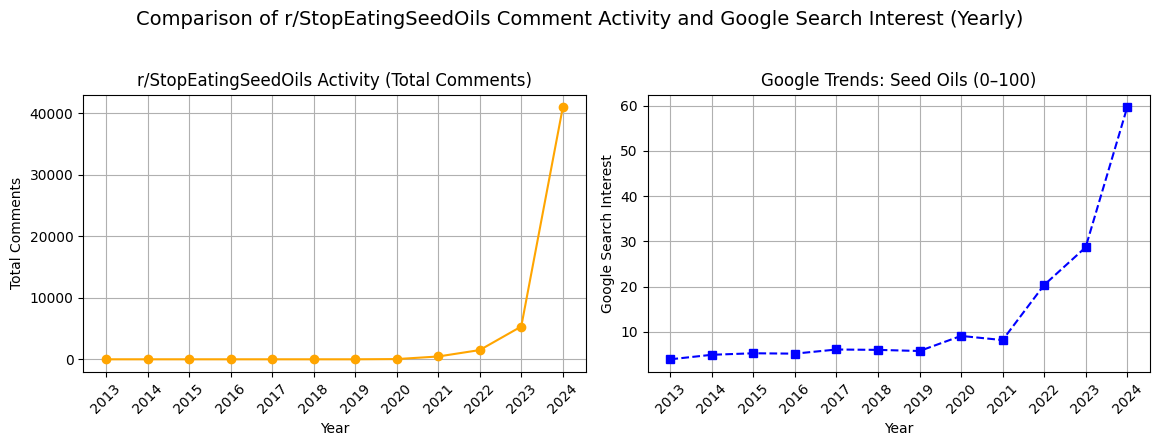

In [54]:
# Load Reddit dataset
df = pd.read_csv("comments_final.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'StopEatingSeedOils' subreddit
df_seedoils = df[df["subreddit"].str.lower() == "stopeatingseedoils"]

# Group by year
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load Google Trends dataset
google_trends = pd.read_csv("seed_oils_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])

# Identify correct Google Trends value column
value_column = google_trends.columns[1]

# Filter date range
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year

# Group Google Trends by year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.7, 4.5), sharex=True)

# Reddit total comments plot
axes[0].plot(full_range, seedoils_yearly_counts.values, color="orange", marker="o", linestyle="-")
axes[0].set_title("r/StopEatingSeedOils Activity (Total Comments)", fontsize=12)
axes[0].set_ylabel("Total Comments", fontsize=10)
axes[0].grid(True)

# Google Trends plot
axes[1].plot(full_range, google_yearly.values, color="blue", marker="s", linestyle="--")
axes[1].set_title("Google Trends: Seed Oils (0–100)", fontsize=12)
axes[1].set_ylabel("Google Search Interest", fontsize=10)
axes[1].grid(True)

# Common X-axis settings
for ax in axes:
    ax.set_xlabel("Year", fontsize=10)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)

plt.suptitle("Comparison of r/StopEatingSeedOils Comment Activity and Google Search Interest (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


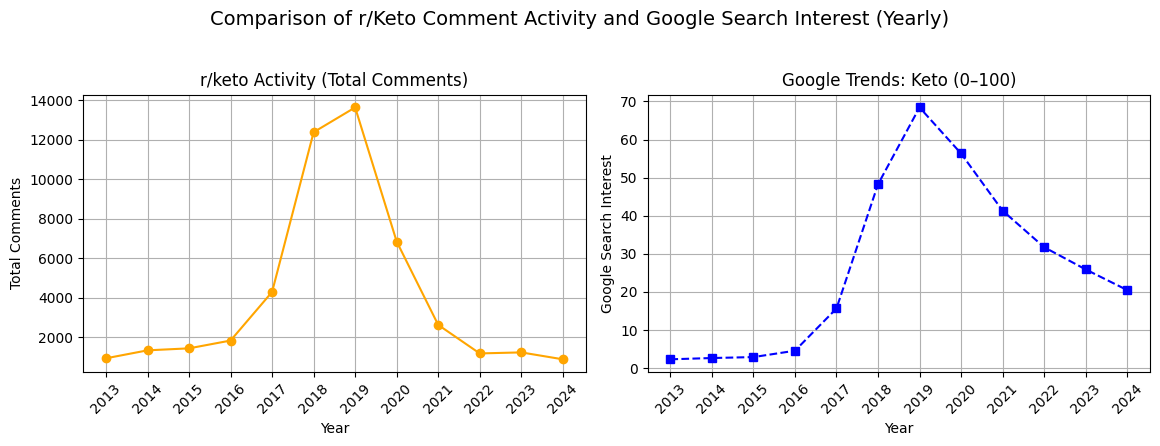

In [56]:
# Load Reddit dataset
df = pd.read_csv("b_conventional_comments.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'StopEatingSeedOils' subreddit
df_seedoils = df[df["subreddit"].str.lower() == "keto"]

# Group by year
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load Google Trends dataset
google_trends = pd.read_csv("keto_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])

# Identify correct Google Trends value column
value_column = google_trends.columns[1]

# Filter date range
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year

# Group Google Trends by year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.7, 4.5), sharex=True)

# Reddit total comments plot
axes[0].plot(full_range, seedoils_yearly_counts.values, color="orange", marker="o", linestyle="-")
axes[0].set_title("r/keto Activity (Total Comments)", fontsize=12)
axes[0].set_ylabel("Total Comments", fontsize=10)
axes[0].grid(True)

# Google Trends plot
axes[1].plot(full_range, google_yearly.values, color="blue", marker="s", linestyle="--")
axes[1].set_title("Google Trends: Keto (0–100)", fontsize=12)
axes[1].set_ylabel("Google Search Interest", fontsize=10)
axes[1].grid(True)

# Common X-axis settings
for ax in axes:
    ax.set_xlabel("Year", fontsize=10)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)

plt.suptitle("Comparison of r/Keto Comment Activity and Google Search Interest (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


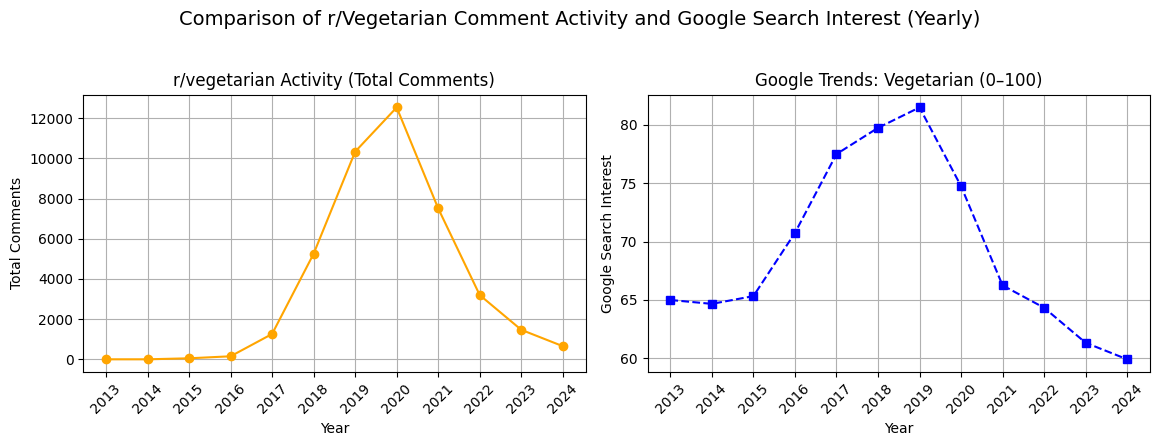

In [ ]:
# Load Reddit dataset
df = pd.read_csv("b_conventional_comments.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'StopEatingSeedOils' subreddit
df_seedoils = df[df["subreddit"].str.lower() == "vegetarian"]

# Group by year
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load Google Trends dataset
google_trends = pd.read_csv("vegetarian_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])

# Identify correct Google Trends value column
value_column = google_trends.columns[1]

# Filter date range
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year

# Group Google Trends by year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.7, 4.5), sharex=True)

# Reddit total comments plot
axes[0].plot(full_range, seedoils_yearly_counts.values, color="orange", marker="o", linestyle="-")
axes[0].set_title("r/vegetarian Activity (Total Comments)", fontsize=12)
axes[0].set_ylabel("Total Comments", fontsize=10)
axes[0].grid(True)

# Google Trends plot
axes[1].plot(full_range, google_yearly.values, color="blue", marker="s", linestyle="--")
axes[1].set_title("Google Trends: Vegetarian (0–100)", fontsize=12)
axes[1].set_ylabel("Google Search Interest", fontsize=10)
axes[1].grid(True)

# Common X-axis settings
for ax in axes:
    ax.set_xlabel("Year", fontsize=10)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)

plt.suptitle("Comparison of r/Vegetarian Comment Activity and Google Search Interest (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


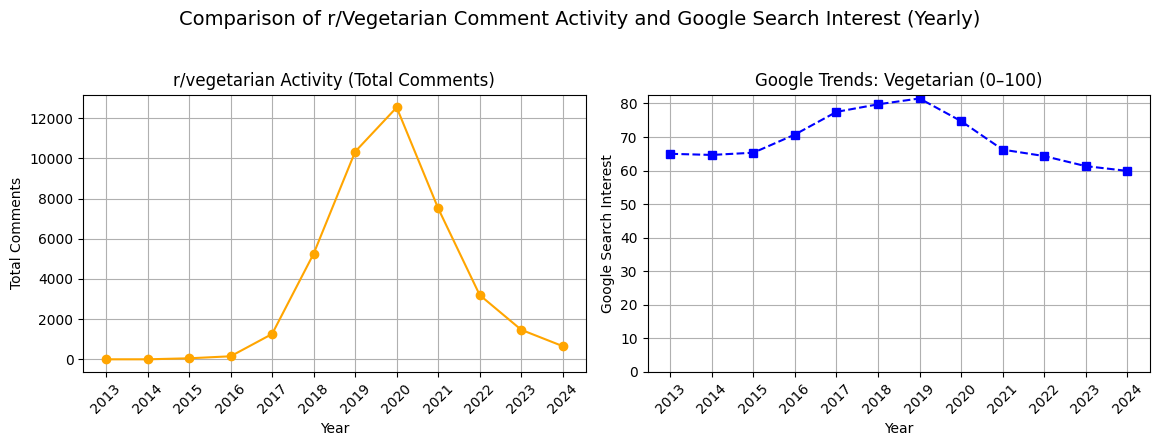

In [58]:
# Load Reddit dataset
df = pd.read_csv("b_conventional_comments.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'vegetarian' subreddit
df_seedoils = df[df["subreddit"].str.lower() == "vegetarian"]

# Group by year
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load Google Trends dataset
google_trends = pd.read_csv("vegetarian_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])

# Identify correct Google Trends value column
value_column = google_trends.columns[1]

# Filter date range
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year

# Group Google Trends by year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.7, 4.5), sharex=True)

# Reddit total comments plot
axes[0].plot(full_range, seedoils_yearly_counts.values, color="orange", marker="o", linestyle="-")
axes[0].set_title("r/vegetarian Activity (Total Comments)", fontsize=12)
axes[0].set_ylabel("Total Comments", fontsize=10)
axes[0].grid(True)

# Google Trends plot
axes[1].plot(full_range, google_yearly.values, color="blue", marker="s", linestyle="--")
axes[1].set_title("Google Trends: Vegetarian (0–100)", fontsize=12)
axes[1].set_ylabel("Google Search Interest", fontsize=10)
axes[1].set_ylim(0, None)  # Ensure the y-axis starts at 0
axes[1].grid(True)

# Common X-axis settings
for ax in axes:
    ax.set_xlabel("Year", fontsize=10)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)

plt.suptitle("Comparison of r/Vegetarian Comment Activity and Google Search Interest (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

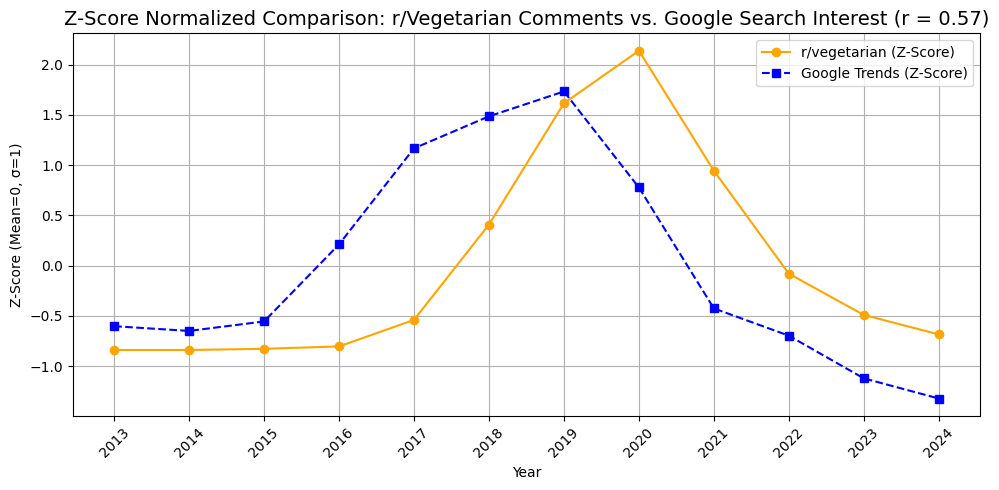

In [ ]:
# Load and preprocess Reddit data
df = pd.read_csv("b_conventional_comments.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'vegetarian' subreddit and group by year
df_seedoils = df[df["subreddit"].str.lower() == "vegetarian"]
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load and preprocess Google Trends data
google_trends = pd.read_csv("vegetarian_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])
value_column = google_trends.columns[1]  # Identify the correct value column
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Z-score normalization
seedoils_z = zscore(seedoils_yearly_counts)
google_z = zscore(google_yearly)

correlation = np.corrcoef(seedoils_z, google_z)[0,1]

# Plot z-score normalized data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(full_range, seedoils_z, color="orange", marker="o", linestyle="-", label="r/vegetarian (Z-Score)")
ax.plot(full_range, google_z, color="blue", marker="s", linestyle="--", label="Google Trends (Z-Score)")
ax.set_title(f"Z-Score Normalized Comparison: r/Vegetarian Comments vs. Google Search Interest", fontsize=14)
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Z-Score (Mean=0, σ=1)", fontsize=10)
ax.set_xticks(full_range)
ax.set_xticklabels(full_range, rotation=45)
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

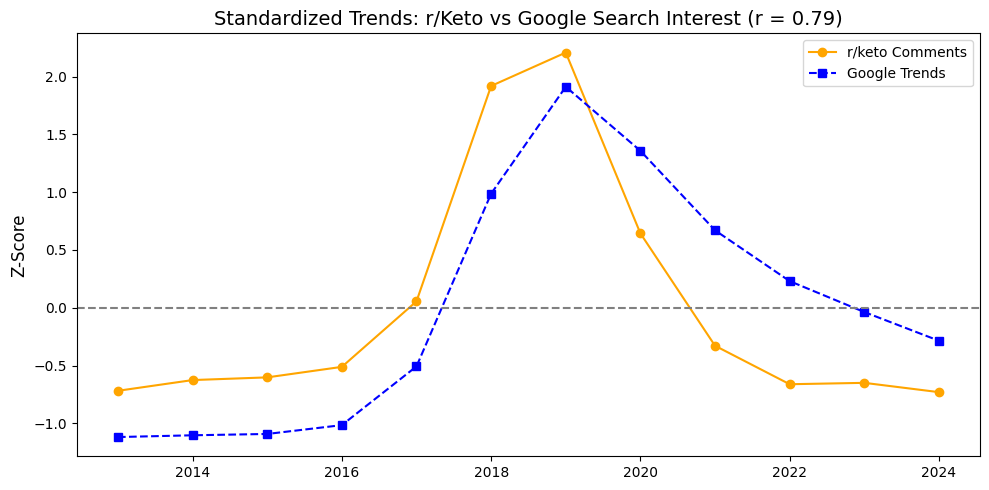

In [66]:
# Load and preprocess Reddit data
df = pd.read_csv("b_conventional_comments.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to 'keto' subreddit and group by year
df_seedoils = df[df["subreddit"].str.lower() == "keto"]
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load and preprocess Google Trends data
google_trends = pd.read_csv("keto_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])
value_column = google_trends.columns[1]  # Identify the correct value column
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Z-score normalization
seedoils_z = zscore(seedoils_yearly_counts)
google_z = zscore(google_yearly)

correlation = np.corrcoef(seedoils_z, google_z)[0,1]

# Plot settings
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(full_range, seedoils_z, color="orange", marker="o", linestyle="-", label="r/keto Comments")
ax.plot(full_range, google_z, color="blue", marker="s", linestyle="--", label="Google Trends")
ax.set_title(f"Standardized Trends: r/Keto vs Google Search Interest (r = {correlation:.2f})", fontsize=14)
ax.set_ylabel("Z-Score", fontsize=12)
ax.axhline(0, color='gray', linestyle='--')
ax.legend()
plt.tight_layout()
plt.show()

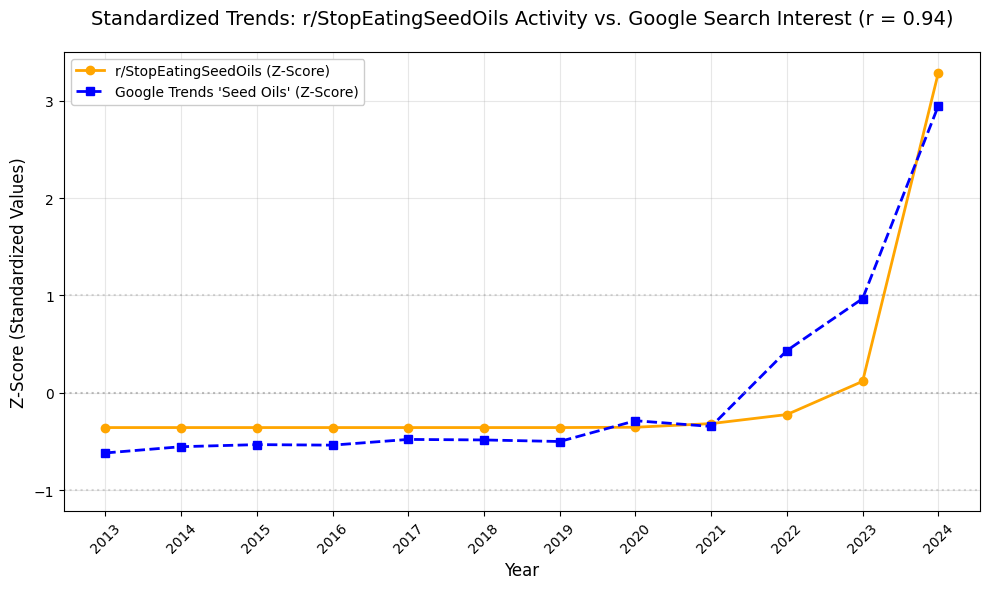

In [65]:
# Load and preprocess Reddit data
df = pd.read_csv("comments_final.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to subreddit and group by year
df_seedoils = df[df["subreddit"].str.lower() == "stopeatingseedoils"]
full_range = list(range(df["year"].min(), df["year"].max() + 1))
seedoils_yearly_counts = df_seedoils.groupby("year").size().reindex(full_range, fill_value=0)

# Load and preprocess Google Trends data
google_trends = pd.read_csv("seed_oils_trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])
value_column = google_trends.columns[1]  # Identify value column
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Z-score normalization
seedoils_z = zscore(seedoils_yearly_counts)
google_z = zscore(google_yearly)

# Calculate correlation coefficient
correlation = np.corrcoef(seedoils_z, google_z)[0,1]

# Create combined plot
plt.figure(figsize=(10, 6))
plt.plot(full_range, seedoils_z, color="orange", marker="o", linestyle="-", linewidth=2, label="r/StopEatingSeedOils (Z-Score)")
plt.plot(full_range, google_z, color="blue", marker="s", linestyle="--", linewidth=2, label="Google Trends 'Seed Oils' (Z-Score)")

# Add reference lines and style
plt.axhline(y=0, color="gray", linestyle=":", alpha=0.5)  # Mean reference
plt.axhline(y=1, color="gray", linestyle=":", alpha=0.3)  # +1 std
plt.axhline(y=-1, color="gray", linestyle=":", alpha=0.3)  # -1 std

# Formatting
plt.title(f"Standardized Trends: r/StopEatingSeedOils Activity vs. Google Search Interest (r = {correlation:.2f})", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Z-Score (Standardized Values)", fontsize=12)
plt.xticks(full_range, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, framealpha=1)

# Adjust layout and show
plt.tight_layout()
plt.show()

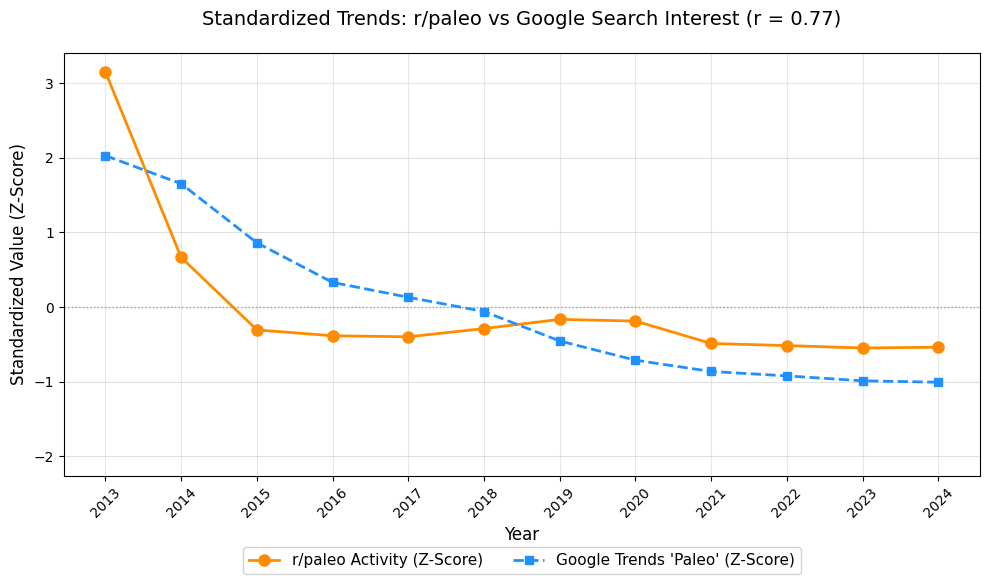

In [63]:

# Load and preprocess Reddit data
df = pd.read_csv("comments_final.csv")
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
df["year"] = df["created_utc"].dt.year

# Filter to subreddit and group by year
df_paleo = df[df["subreddit"].str.lower() == "paleo"]
full_range = list(range(df["year"].min(), df["year"].max() + 1))
paleo_yearly_counts = df_paleo.groupby("year").size().reindex(full_range, fill_value=0)

# Load and preprocess Google Trends data
google_trends = pd.read_csv("paleo google trend.csv")
google_trends.rename(columns=lambda x: x.strip(), inplace=True)
google_trends["Month"] = pd.to_datetime(google_trends["Month"])
value_column = google_trends.columns[1]
google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & (google_trends["Month"] < "2025-01-01")]
google_trends["year"] = google_trends["Month"].dt.year
google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)

# Z-score normalization
paleo_z = zscore(paleo_yearly_counts)
google_z = zscore(google_yearly)

# Calculate correlation coefficient
correlation = np.corrcoef(paleo_z, google_z)[0,1]

# Create combined plot
plt.figure(figsize=(10, 6))
plt.plot(full_range, paleo_z, color="#FF8C00", marker="o", linestyle="-", 
         linewidth=2, markersize=8, label="r/paleo Activity (Z-Score)")
plt.plot(full_range, google_z, color="#1E90FF", marker="s", linestyle="--", 
         linewidth=2, markersize=6, label="Google Trends 'Paleo' (Z-Score)")

# Reference lines and styling
plt.axhline(y=0, color="gray", linestyle=":", alpha=0.7, linewidth=1)
for y in [-2, -1, 1, 2]:
    plt.axhline(y=y, color="gray", linestyle=":", alpha=0.2, linewidth=0.5)

# Formatting
plt.title(f"Standardized Trends: r/paleo vs Google Search Interest (r = {correlation:.2f})", 
          fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Standardized Value (Z-Score)", fontsize=12)
plt.xticks(full_range, rotation=45)
plt.grid(True, alpha=0.3)

# Legend and final touches
legend = plt.legend(fontsize=11, framealpha=1, 
                   bbox_to_anchor=(0.5, -0.15), 
                   loc='upper center', ncol=2)
legend.get_frame().set_edgecolor('lightgray')

plt.tight_layout()
plt.show()

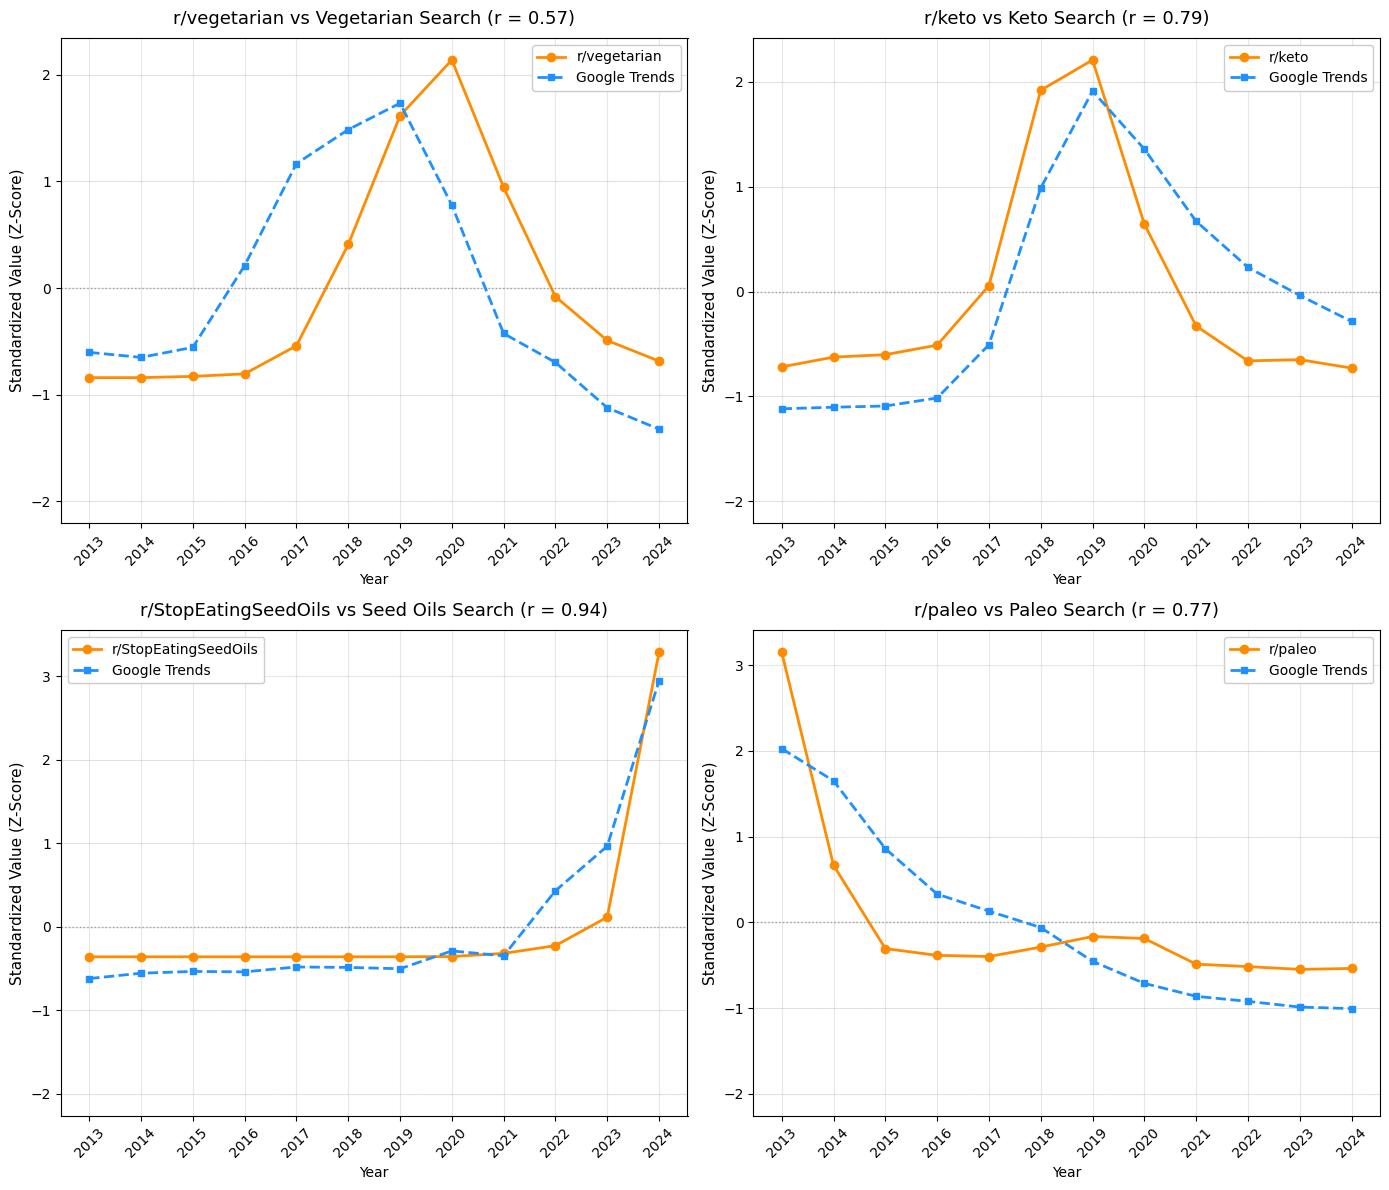

In [72]:
# Set up the 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Define color scheme and styling
reddit_color = "#FF8C00"  # Dark orange
google_color = "#1E90FF"  # Dodger blue
marker_size = 6
line_width = 2

# Define a function to process and plot each subreddit
def plot_standardized_trends(ax, subreddit_name, google_trends_file, title, csv_file):
    # Load Reddit data from the appropriate CSV
    df = pd.read_csv(csv_file)
    df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
    df = df[(df["created_utc"] >= "2013-01-01") & (df["created_utc"] < "2025-01-01")]
    df["year"] = df["created_utc"].dt.year
    
    # Filter to subreddit and group by year
    df_sub = df[df["subreddit"].str.lower() == subreddit_name.lower()]
    full_range = list(range(df["year"].min(), df["year"].max() + 1))
    sub_yearly_counts = df_sub.groupby("year").size().reindex(full_range, fill_value=0)
    
    # Load and preprocess Google Trends data
    google_trends = pd.read_csv(google_trends_file)
    google_trends.rename(columns=lambda x: x.strip(), inplace=True)
    google_trends["Month"] = pd.to_datetime(google_trends["Month"])
    value_column = google_trends.columns[1]
    google_trends = google_trends[(google_trends["Month"] >= "2013-01-01") & 
                                 (google_trends["Month"] < "2025-01-01")]
    google_trends["year"] = google_trends["Month"].dt.year
    google_yearly = google_trends.groupby("year")[value_column].mean().reindex(full_range, fill_value=0)
    
    # Z-score normalization
    sub_z = zscore(sub_yearly_counts)
    google_z = zscore(google_yearly)
    
    # Calculate correlation
    correlation = np.corrcoef(sub_z, google_z)[0,1]
    
    # Plot both standardized trends
    ax.plot(full_range, sub_z, color=reddit_color, marker="o", linestyle="-",
            linewidth=line_width, markersize=marker_size, label=f"r/{subreddit_name}")
    ax.plot(full_range, google_z, color=google_color, marker="s", linestyle="--",
            linewidth=line_width, markersize=marker_size-1, label="Google Trends")
    
    # Reference lines and styling
    ax.axhline(y=0, color="gray", linestyle=":", alpha=0.7, linewidth=1)
    for y in [-2, -1, 1, 2]:
        ax.axhline(y=y, color="gray", linestyle=":", alpha=0.2, linewidth=0.5)
    
    # Formatting
    ax.set_title(f"{title} (r = {correlation:.2f})", fontsize=13, pad=10)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Standardized Value (Z-Score)", fontsize=11)
    ax.set_xticks(full_range)
    ax.set_xticklabels(full_range, rotation=45)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10, framealpha=1)

# Plot each subreddit in its respective subplot with correct CSV files
plot_standardized_trends(axes[0,0], "vegetarian", "vegetarian_trend.csv", 
                        "r/vegetarian vs Vegetarian Search", "b_conventional_comments.csv")
plot_standardized_trends(axes[0,1], "keto", "keto_trend.csv", 
                        "r/keto vs Keto Search", "b_conventional_comments.csv")
plot_standardized_trends(axes[1,0], "StopEatingSeedOils", "seed_oils_trend.csv", 
                        "r/StopEatingSeedOils vs Seed Oils Search", "comments_final.csv")
plot_standardized_trends(axes[1,1], "paleo", "paleo google trend.csv", 
                        "r/paleo vs Paleo Search", "comments_final.csv")

# Main title
#plt.suptitle("Standardized Comparison of Subreddit Activity and Google Search Interest (2013-2024)", 
             #fontsize=14, y=0.98)

plt.tight_layout()
plt.show()